# Exercicio 1

Saving imagem1.png to imagem1 (4).png


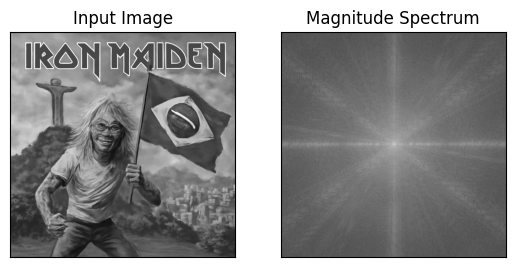

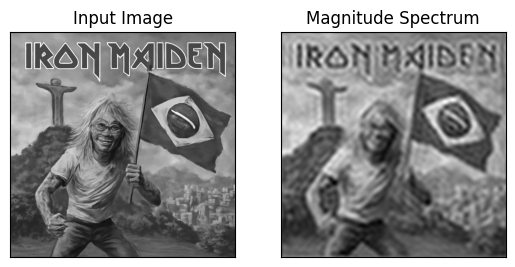

In [ ]:
import cv2 as cv
import numpy as np
from google.colab import files
from google.colab.patches import cv2_imshow
from matplotlib import pyplot as plt

uploaded = files.upload()
img = cv.imread('imagem1.png')
img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

dft = cv.dft(np.float32(img),flags = cv.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

magnitude_spectrum = 20*np.log(cv.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))

plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

rows, cols = img.shape
crow, ccol = rows//2, cols//2

# create a mask first, center square is 1, remaining all zeros
mask = np.zeros((rows,cols,2),np.uint8)
mask[crow-30:crow+30, ccol-30:ccol+30] = 1

# apply mask and inverse DFT
fshift = dft_shift*mask
f_ishift = np.fft.ifftshift(fshift)
img_back = cv.idft(f_ishift)
img_back = cv.magnitude(img_back[:,:,0],img_back[:,:,1])

plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_back, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()


# Exercicio 2

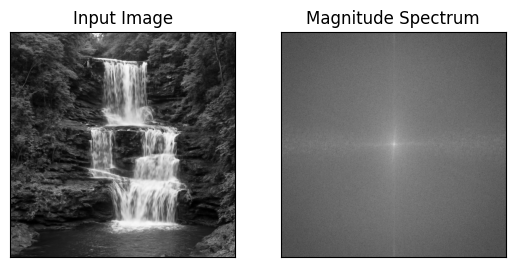

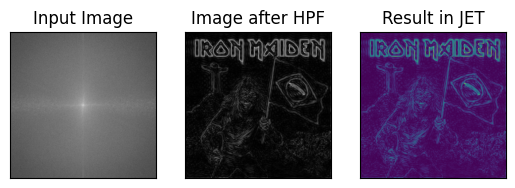

In [ ]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
from google.colab import files
from google.colab.patches import cv2_imshow

uploaded = files.upload()
img = cv.imread('imagem2.png')
img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(fshift))

plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

rows, cols = magnitude_spectrum.shape
crow, ccol = rows//2, cols//2


# create a mask first, center square is 1, remaining all zeros
mask = np.ones((rows,cols,2), np.uint8)
mask[crow-30:crow+30, ccol-30:ccol+30] = 0

# apply mask and inverse DFT
fshift = dft_shift*mask
f_ishift = np.fft.ifftshift(fshift)
img_back = cv.idft(f_ishift)
img_back = cv.magnitude(img_back[:,:,0],img_back[:,:,1])

plt.subplot(131),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(img_back, cmap = 'gray')
plt.title('Image after HPF'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(img_back)
plt.title('Result in JET'), plt.xticks([]), plt.yticks([])

plt.show()

# Exercicio 3

## Imagem 1

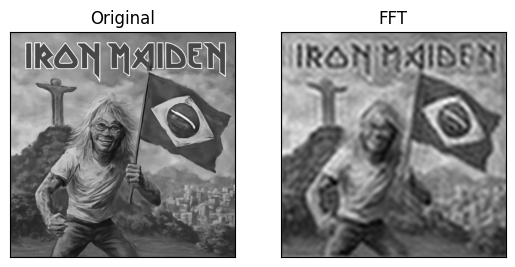

In [ ]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
from google.colab import files
from google.colab.patches import cv2_imshow

uploaded = files.upload()
img = cv.imread('imagem1.png')
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

f = np.fft.fft2(gray)
fshift = np.fft.fftshift(f)

# Criar máscara passa-baixa (low-pass)
rows, cols = gray.shape
crow, ccol = rows // 2 , cols // 2
mask = np.zeros((rows, cols), np.uint8)
mask[crow-30:crow+30, ccol-30:ccol+30] = 1

# Aplicar máscara no domínio da frequência
fshift_filtered = fshift * mask

# Inversa da FFT
f_ishift = np.fft.ifftshift(fshift_filtered)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)

plt.subplot(121),plt.imshow(gray, cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_back, cmap = 'gray')
plt.title('FFT'), plt.xticks([]), plt.yticks([])
plt.show()



## Imagem 2

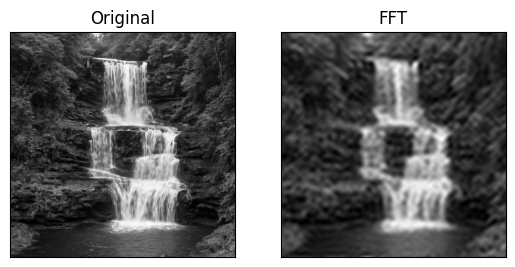

In [ ]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
from google.colab import files
from google.colab.patches import cv2_imshow

uploaded = files.upload()
img = cv.imread('imagem2.png')
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

f = np.fft.fft2(gray)
fshift = np.fft.fftshift(f)

# Criar máscara passa-baixa (low-pass)
rows, cols = gray.shape
crow, ccol = rows // 2 , cols // 2
mask = np.zeros((rows, cols), np.uint8)
mask[crow-30:crow+30, ccol-30:ccol+30] = 1

# Aplicar máscara no domínio da frequência
fshift_filtered = fshift * mask

# Inversa da FFT
f_ishift = np.fft.ifftshift(fshift_filtered)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)

plt.subplot(121),plt.imshow(gray, cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_back, cmap = 'gray')
plt.title('FFT'), plt.xticks([]), plt.yticks([])
plt.show()
